### GL Hackathon 2021

<b> Data Dictionary </b>

<b> 0 denotes extremely poor,  5 denotes delighted experience.,</b>


1. Seat comfort  = 0 to 5
2. Arrival time convenient = 0 to 5
3. Catering = 0 to 5
4. Platform location = 0 to 5
5. onboard wifi service = 0 to 5
6. onboard entertainment = 0 to 5
7. Online support = 0 to 5
8. Ease of Online booking = 0 to 5
9. On-board service = 0 to 5
10. Leg room = 0 to 5
11. Baggage handling =  0 to 5
12. Checkin service = 0 to 5 
13. Cleanliness = 0 to 5
14. Online boarding = 0 to 5
<b>
15. Seat Class = 0 (Ordinary), 1(Green Car)
16. Overall Experience = 1 (delighted), 0(disappointed) </b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
survey_train_df = pd.read_csv('Surveydata_train.csv')
travel_train_df = pd.read_csv('Traveldata_train.csv')

survey_test_df = pd.read_csv('Surveydata_test.csv')
travel_test_df = pd.read_csv('Traveldata_test.csv')

submission = pd.read_csv('Sample_Submission.csv')

In [4]:
#Merging dataset on ID column
train_merged  = pd.merge(survey_train_df, travel_train_df, on= 'ID')
test_merged = pd.merge(survey_test_df, travel_test_df, on= 'ID')

### Train Test Combine

In [5]:
combine_set = pd.concat([train_merged, test_merged], axis=0)
combine_set.tail()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
35597,99935598,NaN,need improvement,Green Car,excellent,need improvement,manageable,acceptable,need improvement,acceptable,...,good,acceptable,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,NaN,need improvement,Ordinary,need improvement,good,need improvement,acceptable,excellent,excellent,...,good,good,Female,Loyal Customer,53.0,Business travel,Business,1772,0.0,0.0
35599,99935600,NaN,good,Green Car,extremely poor,good,need improvement,need improvement,good,poor,...,excellent,need improvement,Male,disloyal Customer,22.0,Business travel,Eco,1180,0.0,0.0
35600,99935601,NaN,excellent,Ordinary,excellent,excellent,Inconvinient,acceptable,excellent,good,...,excellent,good,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0
35601,99935602,NaN,good,Ordinary,acceptable,good,manageable,poor,good,poor,...,good,poor,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0


### EDA

In [6]:
combine_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 35601
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129981 non-null  int64  
 1   Overall_Experience       94379 non-null   float64
 2   Seat_comfort             129898 non-null  object 
 3   Seat_Class               129981 non-null  object 
 4   Arrival_time_convenient  117726 non-null  object 
 5   Catering                 117883 non-null  object 
 6   Platform_location        129939 non-null  object 
 7   Onboardwifi_service      129939 non-null  object 
 8   Onboard_entertainment    129955 non-null  object 
 9   Online_support           129864 non-null  object 
 10  Onlinebooking_Ease       129890 non-null  object 
 11  Onboard_service          119508 non-null  object 
 12  Leg_room                 129866 non-null  object 
 13  Baggage_handling         129799 non-null  object 
 14  Check

In [7]:
combine_set.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,129981.0,9.914043e+07,478045.112148,98800001.0,98832496.0,98864991.0,99903107.0,99935602.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0
Age,129937.0,3.942714e+01,15.122312,7.0,27.0,40.0,51.0,85.0
Travel_Distance,129981.0,1.981152e+03,1026.964654,50.0,1359.0,1924.0,2543.0,6951.0
DepartureDelay_in_Mins,129895.0,1.471107e+01,38.072295,0.0,0.0,0.0,12.0,1592.0
ArrivalDelay_in_Mins,129501.0,1.508839e+01,38.464694,0.0,0.0,0.0,13.0,1584.0


In [8]:
combine_set.describe(include='object').T

,count,unique,top,freq
Seat_comfort,129898,6,acceptable,29161
Seat_Class,129981,2,Green Car,65177
Arrival_time_convenient,117726,6,good,26935
Catering,117883,6,acceptable,25601
Platform_location,129939,6,manageable,33537
Onboardwifi_service,129939,6,good,31578
Onboard_entertainment,129955,6,good,41882
Online_support,129864,6,good,41503
Onlinebooking_Ease,129890,6,good,39934
Onboard_service,119508,6,good,37487


In [9]:
combine_set.drop('ID',axis=1).duplicated().sum()

29

In [10]:
combine_set.isnull().sum()

ID                             0
Overall_Experience         35602
Seat_comfort                  83
Seat_Class                     0
Arrival_time_convenient    12255
Catering                   12098
Platform_location             42
Onboardwifi_service           42
Onboard_entertainment         26
Online_support               117
Onlinebooking_Ease            91
Onboard_service            10473
Leg_room                     115
Baggage_handling             182
Checkin_service               99
Cleanliness                    8
Online_boarding                8
Gender                       107
CustomerType               12334
Age                           44
TypeTravel                 12674
Travel_Class                   0
Travel_Distance                0
DepartureDelay_in_Mins        86
ArrivalDelay_in_Mins         480
dtype: int64

In [11]:
for feature in combine_set.columns: 
    if  combine_set[feature].dtype == 'object': 
        print(feature)
        print(combine_set[feature].value_counts(ascending=False))
        print('\n')
        

Seat_comfort
acceptable          29161
need improvement    28777
good                28403
poor                20940
excellent           17825
extremely poor       4792
Name: Seat_comfort, dtype: int64


Seat_Class
Green Car    65177
Ordinary     64804
Name: Seat_Class, dtype: int64


Arrival_time_convenient
good                26935
excellent           24273
acceptable          21021
need improvement    20674
poor                18823
extremely poor       6000
Name: Arrival_time_convenient, dtype: int64


Catering
acceptable          25601
need improvement    24679
good                24670
poor                19036
excellent           18480
extremely poor       5417
Name: Catering, dtype: int64


Platform_location
manageable           33537
Convinient           30090
need improvement     24535
Inconvinient         22583
very convinient      19192
very inconvinient        2
Name: Platform_location, dtype: int64


Onboardwifi_service
good                31578
excellent           28843


In [12]:
def get_missing_data_details(df):
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False,)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing = missing[missing["Percent"]>0]
  
    plt.figure(figsize = (5,5))
    sns.barplot(missing["Percent"],missing.index)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percentage', fontsize=15)
    plt.title('Missing Data %', fontsize=15)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


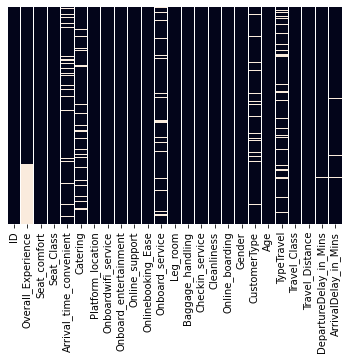

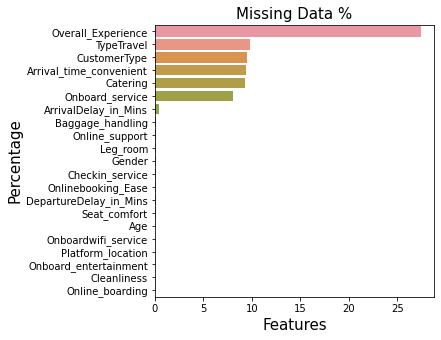

In [13]:
get_missing_data_details(combine_set)

In [14]:
combine_set.TypeTravel.value_counts()

Business travel    80930
Personal Travel    36377
Name: TypeTravel, dtype: int64

In [15]:
combine_set.TypeTravel.isnull().sum()

12674

In [16]:
combine_set['Travel_Class'].isnull().sum()

0

In [17]:
combine_set.Travel_Class.value_counts()

Eco         67815
Business    62166
Name: Travel_Class, dtype: int64

In [18]:
np.where(combine_set['Travel_Class']=='Business', combine_set['TypeTravel'],  combine_set['TypeTravel'].fillna('Business travel',inplace=True))

np.where(combine_set['Travel_Class']=='Eco', combine_set['TypeTravel'],  combine_set['TypeTravel'].fillna('Personal Travel', inplace=True))

array([None, 'Personal Travel', None, ..., 'Business travel',
       'Personal Travel', 'Personal Travel'], dtype=object)

In [19]:
combine_set[['TypeTravel','Travel_Class']]

,TypeTravel,Travel_Class
0,Business travel,Business
1,Personal Travel,Eco
2,Business travel,Business
3,Business travel,Business
4,Business travel,Business
...,...,...
35597,Personal Travel,Eco
35598,Business travel,Business
35599,Business travel,Eco
35600,Personal Travel,Eco


In [20]:
combine_set.CustomerType.value_counts()

Loyal Customer       96172
disloyal Customer    21475
Name: CustomerType, dtype: int64

In [21]:
combine_set.CustomerType.isnull().sum()

12334

In [22]:
combine_set.CustomerType.mode()[0]

'Loyal Customer'

In [23]:
combine_set.CustomerType.fillna(combine_set.CustomerType.mode()[0], inplace=True)

In [24]:
combine_set.Arrival_time_convenient.fillna(combine_set.Arrival_time_convenient.mode()[0], inplace=True)

In [25]:
combine_set.Catering.fillna(combine_set.Catering.mode()[0], inplace=True)

In [26]:
combine_set.Onboard_service.fillna(combine_set.Onboard_service.mode()[0], inplace=True)

In [27]:
combine_set.DepartureDelay_in_Mins.fillna(combine_set.DepartureDelay_in_Mins.mean(), inplace = True)
combine_set.ArrivalDelay_in_Mins.fillna(combine_set.ArrivalDelay_in_Mins.mean(), inplace = True)

In [28]:
combine_set.isnull().sum()

ID                             0
Overall_Experience         35602
Seat_comfort                  83
Seat_Class                     0
Arrival_time_convenient        0
Catering                       0
Platform_location             42
Onboardwifi_service           42
Onboard_entertainment         26
Online_support               117
Onlinebooking_Ease            91
Onboard_service                0
Leg_room                     115
Baggage_handling             182
Checkin_service               99
Cleanliness                    8
Online_boarding                8
Gender                       107
CustomerType                   0
Age                           44
TypeTravel                     0
Travel_Class                   0
Travel_Distance                0
DepartureDelay_in_Mins         0
ArrivalDelay_in_Mins           0
dtype: int64

In [29]:
combine_set.Seat_comfort.fillna(combine_set.Seat_comfort.mode()[0],inplace=True)

In [30]:
combine_set.Platform_location.fillna(combine_set.Platform_location.mode()[0],inplace=True)

combine_set.Onlinebooking_Ease.fillna(combine_set.Onlinebooking_Ease.mode()[0],inplace=True)

combine_set.Onboardwifi_service.fillna(combine_set.Onboardwifi_service.mode()[0],inplace=True)

combine_set.Online_support.fillna(combine_set.Online_support.mode()[0],inplace=True)

combine_set.Onboard_entertainment.fillna(combine_set.Onboard_entertainment.mode()[0],inplace=True)


In [31]:
combine_set.Leg_room.fillna(combine_set.Leg_room.mode()[0],inplace=True)
combine_set.Baggage_handling.fillna(combine_set.Baggage_handling.mode()[0],inplace=True)
combine_set.Checkin_service.fillna(combine_set.Checkin_service.mode()[0],inplace=True)
combine_set.Cleanliness.fillna(combine_set.Cleanliness.mode()[0],inplace=True)
combine_set.Online_boarding.fillna(combine_set.Online_boarding.mode()[0],inplace=True)
combine_set.Gender.fillna(combine_set.Gender.mode()[0],inplace=True)

In [32]:
combine_set.Age.fillna(combine_set.Age.mode()[0],inplace=True)

Encoding

In [33]:

combine_set['Seat_comfort'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
combine_set['Arrival_time_convenient'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
combine_set['Catering'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
combine_set['Onboardwifi_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 1], inplace = True)
combine_set['Onboard_entertainment'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
combine_set['Online_support'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 1], inplace = True)
combine_set['Onlinebooking_Ease'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 1], inplace = True)
combine_set['Onboard_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 1], inplace = True)
combine_set['Leg_room'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 1], inplace = True)
combine_set['Checkin_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 1], inplace = True)
combine_set['Cleanliness'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 1], inplace = True)
combine_set['Online_boarding'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 1], inplace = True)

In [34]:
combine_set.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0.0,2,Green Car,5,5,very convinient,4,2,3,...,2,1,Female,Loyal Customer,52.0,Business travel,Business,272,0.0,5.0
1,98800002,0.0,1,Ordinary,5,1,need improvement,4,1,4,...,4,4,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1.0,2,Green Car,2,2,need improvement,2,4,5,...,5,5,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,0.0,3,Ordinary,2,3,need improvement,3,2,3,...,3,3,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,1.0,3,Ordinary,3,3,manageable,2,4,5,...,4,4,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [35]:
combine_set['Platform_location'].replace(['very inconvinient','Inconvinient','need improvement','manageable', 'Convinient','very convinient'], [1,1,2,3,4,5], inplace = True)
combine_set['Seat_Class'].replace(['Green Car', 'Ordinary'], [1,0], inplace = True)
combine_set['Baggage_handling'].replace(['extremely poor','poor','need improvement','acceptable','good','excellent'], [0,1,2,3,4,5], inplace = True)

In [36]:
combine_set.head(50)

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0.0,2,1,5,5,5,4,2,3,...,2,1,Female,Loyal Customer,52.0,Business travel,Business,272,0.0,5.0
1,98800002,0.0,1,0,5,1,2,4,1,4,...,4,4,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1.0,2,1,2,2,2,2,4,5,...,5,5,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,0.0,3,0,2,3,2,3,2,3,...,3,3,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,1.0,3,0,3,3,3,2,4,5,...,4,4,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0
5,98800006,1.0,2,0,2,3,2,4,5,4,...,3,3,Male,Loyal Customer,44.0,Business travel,Business,2810,0.0,0.0
6,98800007,0.0,4,1,5,4,1,4,4,4,...,3,4,Male,Loyal Customer,56.0,Personal Travel,Eco,2029,0.0,0.0
7,98800008,0.0,3,1,4,3,1,5,5,4,...,4,5,Male,Loyal Customer,65.0,Personal Travel,Business,853,0.0,3.0
8,98800009,0.0,2,1,2,2,2,3,2,3,...,2,3,Male,Loyal Customer,22.0,Personal Travel,Eco,1636,1.0,0.0
9,98800010,0.0,2,0,4,4,4,3,4,4,...,2,3,Male,Loyal Customer,57.0,Business travel,Business,306,0.0,0.0


In [37]:
combine_set['Gender'].replace(['Female','Male'], [0,1], inplace = True)
combine_set['CustomerType'].replace(['Loyal Customer', 'disloyal Customer'], [1,0], inplace = True)
combine_set['TypeTravel'].replace(['Business travel', 'Personal Travel' ], [1,0], inplace = True)
combine_set['Travel_Class'].replace(['Business', 'Eco' ], [1,0], inplace = True)

In [304]:
combine_set

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0.0,2,1,5,5,5,4,2,3,...,2,1,0,1,52.0,1,1,272,0.0,5.0
1,98800002,0.0,1,0,5,1,2,4,1,4,...,4,4,1,1,48.0,0,0,2200,9.0,0.0
2,98800003,1.0,2,1,2,2,2,2,4,5,...,5,5,0,1,43.0,1,1,1061,77.0,119.0
3,98800004,0.0,3,0,2,3,2,3,2,3,...,3,3,0,1,44.0,1,1,780,13.0,18.0
4,98800005,1.0,3,0,3,3,3,2,4,5,...,4,4,0,1,50.0,1,1,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,99935598,NaN,2,1,5,2,3,3,2,3,...,4,3,1,1,8.0,0,0,1334,0.0,0.0
35598,99935599,NaN,2,0,2,4,2,3,5,5,...,4,4,0,1,53.0,1,1,1772,0.0,0.0
35599,99935600,NaN,4,1,0,4,2,2,4,1,...,5,2,1,0,22.0,1,0,1180,0.0,0.0
35600,99935601,NaN,5,0,5,5,1,3,5,4,...,5,4,0,1,67.0,0,0,420,23.0,16.0


In [38]:
data_outlier = combine_set.copy()

In [306]:
# Defining a funtion to remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [307]:
#capping and flooring of outliers with upper and lower bounds respectively
for column in data_outlier.drop(['ID','Overall_Experience'],axis=1).columns:
    if data_outlier[column].dtype != 'object':
        lr,ur=remove_outlier(data_outlier[column])
        data_outlier[column]=np.where(data_outlier[column]>ur,ur,data_outlier[column])
        data_outlier[column]=np.where(data_outlier[column]<lr,lr,data_outlier[column])

In [145]:
train_df = pd.DataFrame(data_outlier[data_outlier['Overall_Experience'].notna()])
test_df = pd.DataFrame(data_outlier[data_outlier['Overall_Experience'].isna()])

### Train Test Split

In [146]:

x = train_df.drop(['Overall_Experience','ID', 'Seat_Class'], axis=1)
y = train_df['Overall_Experience'] 

In [147]:

#x1 = train_df.drop(['Overall_Experience','ID','Age'], axis=1)
#y1 = train_df['Overall_Experience'] 

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state = 12)

In [150]:
#x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.20, random_state = 12)

1. Random Forest

In [ ]:
max_depth': [5, 15],
    'min_samples_leaf': [2, 8],
    'n_estimators': [50, 100],
    'max_features': [5, 10]

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfr = RandomForestClassifier(n_estimators=200,max_features=22, min_samples_leaf=100, max_depth=200)
rfr.fit(x_train,y_train) #Fitting model

rfr_train_pred = rfr.predict(x_train)  # predicting on Train set
rfr_test_pred = rfr.predict(x_test)   # predicting on Test set

## Accuracy Score on both sets

print('Accuracy Score on Train Set: ',accuracy_score(y_train, rfr_train_pred))
print('Accuracy Score on Train Set: ',accuracy_score(y_test,rfr_test_pred))


Accuracy Score on Train Set:  0.9230626597618637
Accuracy Score on Train Set:  0.9251430387794024


In [156]:
test1_df = test_df.drop(['Overall_Experience','ID','Seat_Class'], axis=1)

In [157]:
submission['Overall_Experience'] = rfr.predict(test1_df)

In [158]:
submission.to_csv('last.csv', index=False)

In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [63]:
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)
test1_df_scaled = ss.transform(test1_df)

In [71]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=9)
# fit the model

In [72]:
KNN_model.fit(x_train_scaled, y_train)

knn_train_pred = KNN_model.predict(x_train)  # predicting on Train set
knn_test_pred = KNN_model.predict(x_test)   # predicting on Test set

## Accuracy Score on both sets

print('Accuracy Score on Train Set: ',accuracy_score(y_train, knn_train_pred))
print('Accuracy Score on Train Set: ',accuracy_score(y_test,knn_test_pred))


Accuracy Score on Train Set:  0.544468431717945
Accuracy Score on Train Set:  0.5393621529985166


In [69]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # evaluate test accuracy
    scores = knn.score(x_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


[0.33147912693367243,
 0.31611570247933884,
 0.31145369781733423,
 0.3103411739775376,
 0.3102352193261284,
 0.31134774316592495,
 0.3111358338631066,
 0.31389065479974576,
 0.3142614960796779,
 0.3172282263191354]

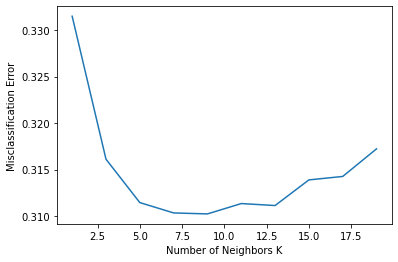

In [70]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [73]:
from sklearn.ensemble import AdaBoostClassifier

In [79]:
ada_rf = AdaBoostClassifier(base_estimator = rfr,n_estimators=500, learning_rate=1)
#ada2 = AdaBoostClassifier(base_estimator=dTree, n_estimators=20, learning_rate=0.01, random_state= 88)

In [80]:
ada_rf.fit(x_train_scaled,y_train) #Fitting model

ada_train_pred = ada_rf.predict(x_train_scaled)  # predicting on Train set
ada_test_pred = ada_rf.predict(x_test_scaled)   # predicting on Test set

## Accuracy Score on both sets

print('Accuracy Score on Train Set: ',accuracy_score(y_train, ada_train_pred))
print('Accuracy Score on Train Set: ',accuracy_score(y_test,ada_test_pred))


Accuracy Score on Train Set:  1.0
Accuracy Score on Train Set:  0.9538037719855902


In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [113]:
gbcl = GradientBoostingClassifier(n_estimators=750,max_depth=30,random_state=1)
gbcl.fit(x_train_scaled,y_train)

gbcl_train_pred = gbcl.predict(x_train_scaled)
gbcl_test_pred = gbcl.predict(x_test_scaled)


print('Accuracy Score on Train Set: ',accuracy_score(y_train, gbcl_train_pred))
print('Accuracy Score on Train Set: ',accuracy_score(y_test,gbcl_test_pred))


Accuracy Score on Train Set:  1.0
Accuracy Score on Train Set:  0.9382814155541428


In [102]:
submission['Overall_Experience'] = gbcl.predict(test1_df_scaled)

In [103]:
submission.to_csv('GBoost3.csv', index=False)

In [105]:
!pip install xgboost

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
clfXGB=xgb.XGBClassifier(n_estimators= 1500, max_depth = 300, random_state=2,learning_rate=1.0)
clfXGB.fit(x_train, y_train)
y_train_pred=clfXGB.predict(x_train)
y_test_pred = clfXGB.predict(x_test)

print('Accuracy Score on Train Set: ',accuracy_score(y_train, y_train_pred))
print('Accuracy Score on Train Set: ',accuracy_score(y_test, y_test_pred))


[22:00:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [162]:
submission['Overall_Experience'] = clfXGB.predict(test1_df)

In [163]:
submission.to_csv('xgb.csv',index=False)

In [141]:
train_set = combine_set[combine_set['Overall_Experience'].notna()]
test_set = combine_set[combine_set['Overall_Experience'].isna()]

X = train_set.drop(['ID','Overall_Experience','Seat_Class'], axis=1)
Y = train_set['Overall_Experience']


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=13)

In [144]:
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
clfXGB=xgb.XGBClassifier(booster = 'gbtree', learning_rate = 1, max_depth = 200, n_estimators = 1000)
clfXGB.fit(X_train, Y_train)
y_train_pred=clfXGB.predict(X_train)
y_test_pred = clfXGB.predict(X_test)

print('Accuracy Score on Train Set: ',accuracy_score(Y_train, y_train_pred))
print('Accuracy Score on Train Set: ',accuracy_score(Y_test, y_test_pred))


[21:27:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score on Train Set:  1.0
Accuracy Score on Train Set:  0.9522144522144522


In [134]:
test_df = test1_df.drop('Platform_location', axis=1)

In [ ]:
rf = RandomForestClassifier()

parameters_grid = {
    'max_depth': [5, 15],
    'min_samples_leaf': [2, 8],
    'n_estimators': [50, 100],
    'max_features': [5, 10]
}

# get predictions
y_pred, grid_search = fit_predict(X_train, X_test, y_train, rf, parameters_grid)

# calculate metrics
scores, mat = get_class_metrics(y_test, y_pred)


In [135]:
submission['Overall_Experience'] = clfXGB.predict(test_df)

In [136]:
submission.to_csv('feature_reduction.csv', index=False)

In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

In [ ]:
import os 
os.getcwd()

In [228]:
from sklearn.model_selection import GridSearchCV

In [237]:
param_grid = {
    'max_depth': [10],
    'max_features': [4],
    'min_samples_leaf': [3],
    'min_samples_split': [30],
    'n_estimators': [300]
}

rfr = RandomForestClassifier(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [238]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [10], 'max_features': [4],
                         'min_samples_leaf': [3], 'min_samples_split': [30],
                         'n_estimators': [300]})

In [239]:
print(grid_search.fit(x_train_scaled,y_train))

{'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


In [261]:
rfr2 = RandomForestClassifier(max_depth= 25, max_features=22, min_samples_leaf=300, min_samples_split=500,n_estimators=1000)

In [262]:
rfr2.fit(x_train,y_train) #Fitting model

rfr2_train_pred = rfr2.predict(x_train)  # predicting on Train set
rfr2_test_pred = rfr2.predict(x_test)   # predicting on Test set

## Accuracy Score on both sets

print('Accuracy Score on Train Set: ',accuracy_score(y_train, rfr2_train_pred))
print('Accuracy Score on Train Set: ',accuracy_score(y_test,rfr2_test_pred))


Accuracy Score on Train Set:  0.8968120472034223
Accuracy Score on Train Set:  0.89907819453274


In [251]:
file['Overall_Experience'] = rfr2.predict(test1_df) # Prediction

<ipython-input-251-130a77358fa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['Overall_Experience'] = rfr2.predict(test1_df) # Prediction


In [252]:
file.to_csv('rfr2.csv')

2. ADA Boosting

In [381]:
from sklearn.ensemble import AdaBoostClassifier

In [438]:
ada_rf = AdaBoostClassifier(base_estimator = rfr,n_estimators=2000, learning_rate=0.01)
#ada2 = AdaBoostClassifier(base_estimator=dTree, n_estimators=20, learning_rate=0.01, random_state= 88)

In [439]:
ada_rf.fit(x_train_scaled,y_train) #Fitting model

ada_train_pred = ada_rf.predict(x_train_scaled)  # predicting on Train set
ada_test_pred = ada_rf.predict(x_test_scaled)   # predicting on Test set

## Accuracy Score on both sets

print('Accuracy Score on Train Set: ',accuracy_score(y_train, ada_train_pred))
print('Accuracy Score on Train Set: ',accuracy_score(y_test,ada_test_pred))


Accuracy Score on Train Set:  1.0
Accuracy Score on Train Set:  0.9535918626827717


In [424]:
file['Overall_Experience'] = ada_rf.predict(test1_df_scaled)

<ipython-input-424-7a292371a1cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['Overall_Experience'] = ada_rf.predict(test1_df_scaled)


In [425]:
file.to_csv('Ada500.csv', index=False)

In [440]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

lr.fit(x_train_scaled,y_train) #Fitting model

lr_train_pred = lr.predict(x_train_scaled)  # predicting on Train set
lr_test_pred = lr.predict(x_test_scaled)   # predicting on Test set

## Accuracy Score on both sets

print('Accuracy Score on Train Set: ',accuracy_score(y_train, lr_train_pred))
print('Accuracy Score on Train Set: ',accuracy_score(y_test,lr_test_pred))


In [ ]:
file['Overall_Experience'] = lr.predict(test1_df) # Prediction

In [ ]:
file

In [ ]:
file.to_csv('LogR.csv')

In [442]:
from sklearn.neural_network import MLPClassifier

In [452]:
clf = MLPClassifier(random_state=2, max_iter=500).fit(x_train_scaled, y_train)

In [453]:
clf_train_pred = clf.predict(x_train_scaled)
clf_test_pred = clf.predict(x_test_scaled)

print('Accuracy Score on Train Set: ',accuracy_score(y_train, clf_train_pred))
print('Accuracy Score on Train Set: ',accuracy_score(y_test,clf_test_pred))


Accuracy Score on Train Set:  0.9625312901474113
Accuracy Score on Train Set:  0.9506251324433143


In [454]:
file['Overall_Experience'] = clf.predict(test1_df_scaled)

<ipython-input-454-a338b80fad1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['Overall_Experience'] = clf.predict(test1_df_scaled)


In [455]:
file.to_csv('MLP1.csv',index=False)

In [456]:
param_grid = {
    #'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPClassifier(max_iter=1000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [457]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=123),
             param_grid={'activation': ['tanh', 'relu'],
                         'solver': ['sgd', 'adam']})

In [458]:
mlp_train_pred = grid_search.predict(x_train_scaled)
mlp_test_pred = grid_search.predict(x_test_scaled)


print('Accuracy Score on Train Set: ',accuracy_score(y_train, mlp_train_pred))
print('Accuracy Score on Train Set: ',accuracy_score(y_test,mlp_test_pred))


Accuracy Score on Train Set:  0.9612598174906958
Accuracy Score on Train Set:  0.9458571731299004


In [384]:
from sklearn.preprocessing import StandardScaler

In [385]:
ss = StandardScaler()

In [386]:
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)
test1_df_scaled = ss.transform(test1_df)

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfr = RandomForestClassifier()
rfr.fit(x_train_scaled,y_train) #Fitting model

rfr_train_pred = rfr.predict(x_train_scaled)  # predicting on Train set
rfr_test_pred = rfr.predict(x_test_scaled)   # predicting on Test set

## F1 Score on both sets

print('Accuracy Score on Train Set: ',accuracy_score(y_train, rfr_train_pred))
print('Accuracy Score on Train Set: ',accuracy_score(y_test,rfr_test_pred))


Accuracy Score on Train Set:  1.0
Accuracy Score on Train Set:  0.9494066539521085


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()


In [ ]:
lda.fit(x_train_scaled,y_train) #Fitting model

lda_train_pred = lda.predict(x_train_scaled)  # predicting on Train set
lda_test_pred = lda.predict(x_test_scaled)   # predicting on Test set

## Accuracy Score on both sets

print('Accuracy Score on Train Set: ',accuracy_score(y_train, lda_train_pred))
print('Accuracy Score on Train Set: ',accuracy_score(y_test,lda_test_pred))


In [ ]:
file['Overall_Experience'] = lda.predict(test1_df) # Prediction

In [ ]:
file.to_csv('LDA.csv')

In [ ]:
combine_set.columns

In [ ]:
data_plot=data_outlier[['Age', 'TypeTravel', 'Travel_Class', 'Travel_Distance',
       'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',combine_set.shape)

In [ ]:
x1 = ss.fit_transform(x)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=12, n_repeats=12, random_state=1)
# evaluate model
scores = cross_val_score(lda, x1, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


In [ ]:
def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0])
    
    return data

# Remove Duplicates from "train" data :

train_df = remove_duplicate(train_df)

# No Duplicates at all !!!

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestClassifier(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(x_train_scaled,y_train)

In [ ]:
print(grid_search.best_params_)